In [189]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Generate synthetic housing data
np.random.seed(42)
X = np.linspace(500, 3500, 10000)  # size in square feet
true_w = 120  # $/sqft
true_b = 50000  # base price
noise = np.random.normal(0, 20000, size=X.shape)
y = true_w * X + true_b + noise



In [193]:
# 8. Plot 3D surface and contours for J(w, b)
w_vals = np.linspace(true_w-50, true_w+50, 50)
b_vals = np.linspace(true_b-20000, true_b+20000, 50)
W, B = np.meshgrid(w_vals, b_vals)
J_grid = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_grid[i, j] = J(W[i, j], B[i, j], X, y)

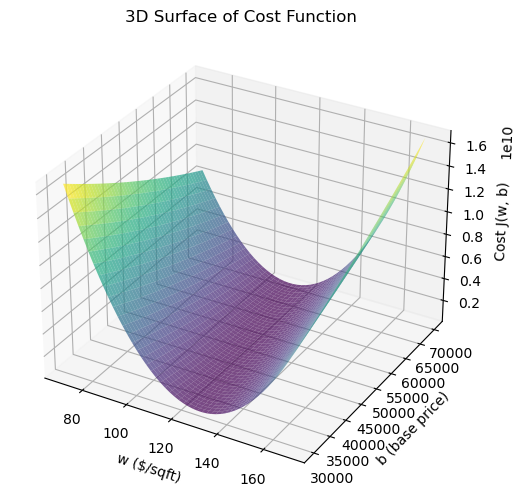

In [194]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_grid, cmap='viridis', alpha=0.7)
ax.set_xlabel('w ($/sqft)')
ax.set_ylabel('b (base price)')
ax.set_zlabel('Cost J(w, b)')
plt.title('3D Surface of Cost Function')
plt.show()

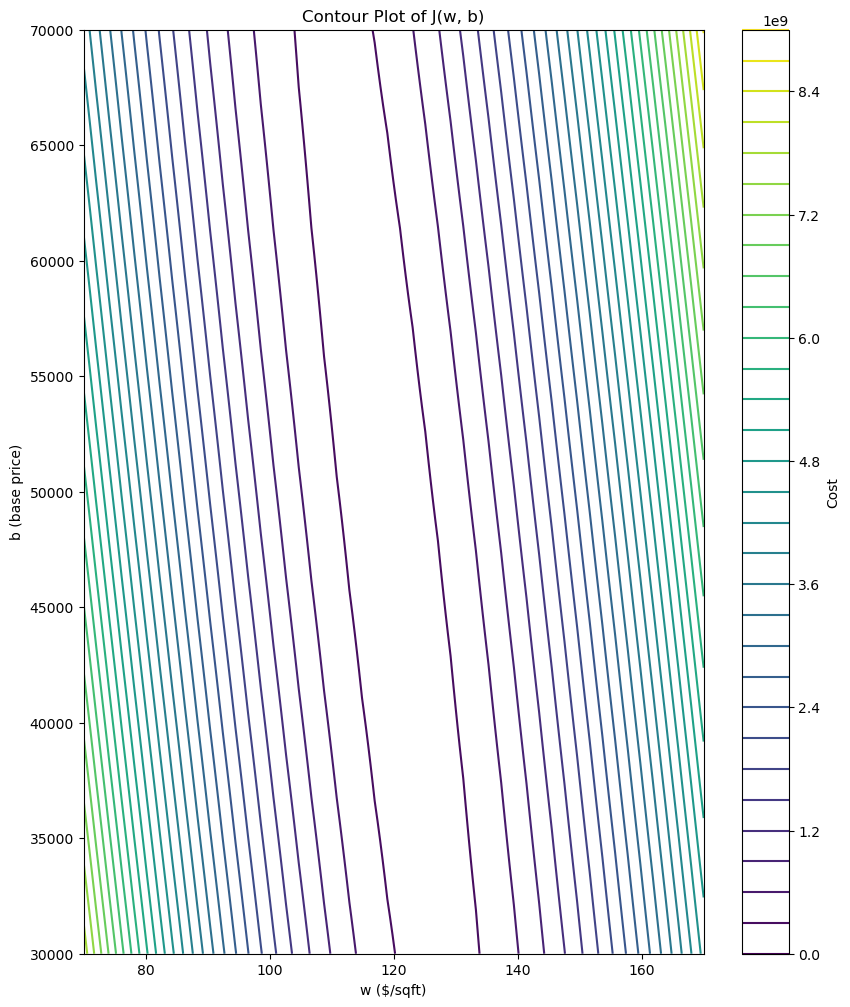

In [177]:
# Contour Plot
plt.figure(figsize=(10, 12))
cp = plt.contour(W, B, J_grid, levels=30, cmap='viridis')
plt.xlabel('w ($/sqft)')
plt.ylabel('b (base price)')
plt.title('Contour Plot of J(w, b)')
plt.colorbar(cp, label='Cost')

In [190]:
def J(w, b, X, y):
    return np.mean((w * X + b - y) ** 2)

def dJ_dw(w, b, X, y):
    return np.mean((w * X + b - y) * X)

def dJ_db(w, b, X, y):
    return np.mean(w * X + b - y)

def gradient_descent(X, y, w0, b0, alpha, num_iters):
    w, b = w0, b0
    cost_history = []
    for i in range(num_iters):
        dw = dJ_dw(w, b, X, y)
        db = dJ_db(w, b, X, y)
        w = w - alpha * dw
        b = b - alpha * db
        cost = J(w, b, X, y)
        cost_history.append(cost)
        if i % 10000 == 0:
            print(f"Iter {i}: w={w}, b={b}, cost={cost}")
    return w, b, cost_history


In [ ]:
# Suppose you have your data:
mean_X = np.mean(X)
std_X = np.std(X)
X_scaled = (X - mean_X) / std_X

w0 = 0
b0 = np.mean(y)
alpha = 0.001
num_iters = 100000
w_final, b_final, cost_hist = gradient_descent(X_scaled, y, w0, b0, alpha, num_iters)

w_real = w_final / std_X
b_real = b_final - (w_final * mean_X) / std_X

print("\nModel on original scale:")
print(f"w = {w_real:.2f}   # dollars per sqft")
print(f"b = {b_real:.2f}   # base price in dollars")
print(f"Final cost J(w, b) = {cost_history[-1]:.2f}")







Iter 0: w=103.73501990160574, b=289957.2803326315, cost=11142138257.35431
Iter 10000: w=103730.33852971965, b=289957.2803326315, cost=402695073.03663594
Iter 20000: w=103735.01969013229, b=289957.2803326315, cost=402695051.12139326
Iter 30000: w=103735.01990159617, b=289957.2803326315, cost=402695051.12139314
Iter 40000: w=103735.01990159845, b=289957.2803326315, cost=402695051.1213932
Iter 50000: w=103735.01990159845, b=289957.2803326315, cost=402695051.1213932
Iter 60000: w=103735.01990159845, b=289957.2803326315, cost=402695051.1213932
Iter 70000: w=103735.01990159845, b=289957.2803326315, cost=402695051.1213932
Iter 80000: w=103735.01990159845, b=289957.2803326315, cost=402695051.1213932
Iter 90000: w=103735.01990159845, b=289957.2803326315, cost=402695051.1213932

Model on original scale:
w = 119.77   # dollars per sqft
b = 50415.47   # base price in dollars
Final cost J(w, b) = 263885814.82


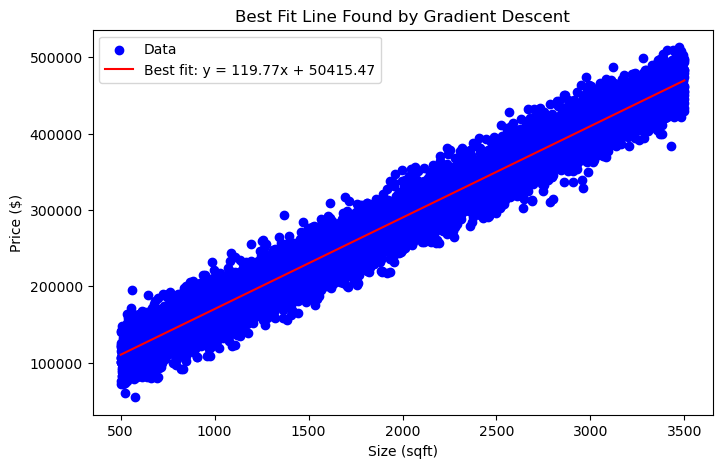

In [192]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, w_real * X + b_real, color='red', label=f'Best fit: y = {w_real:.2f}x + {b_real:.2f}')
plt.xlabel("Size (sqft)")
plt.ylabel("Price ($)")
plt.legend()
plt.title("Best Fit Line Found by Gradient Descent")
plt.show()